# 2D Quantum Dot, Harmonic Osc, TDCCSD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from quantum_systems import TwoDimensionalHarmonicOscillator
from quantum_systems.time_evolution_operators import LaserField
from coupled_cluster.ccsd import TDCCSD
from coupled_cluster.integrators import GaussIntegrator

In [2]:
class LaserPulse:

    def __init__(self, t_0=0, t_final=10, omega=8, strength=0.03):
        self.t_0 = t_0
        self.t_final = t_final
        self.omega = omega
        self.strength = strength

    def __call__(self, t):
        return self.strength * np.sin(self.omega * t)

In [3]:
n = 2
l = 20

radius = 8
num_grid_points = 401
omega = 1 / 6
mass = 1

tdho = TwoDimensionalHarmonicOscillator(n, l, radius, num_grid_points, omega=omega, mass=mass)
tdho.setup_system()

In [4]:
polarization_vector = np.zeros(2)
polarization_vector[0] = 1

laser = LaserField(
    LaserPulse(omega=8*omega, strength=0.5),
    polarization_vector=polarization_vector
)

tdho.set_time_evolution_operator(laser)
tdho.change_to_hf_basis(tolerance=1e-8)

In [5]:
integrator = GaussIntegrator(np=np, eps=1e-10)
tdccsd = TDCCSD(tdho, np=np, integrator=integrator, verbose=True)

tdccsd.compute_ground_state()
print("Ground state energy: {0}".format(tdccsd.compute_ground_state_energy()))

Iteration: 0	Residuals (t): [0.003897014037069468, 0.16653061565795876]
Iteration: 1	Residuals (t): [0.007686094537642749, 0.06530850156515973]
Iteration: 2	Residuals (t): [0.0025030095799434865, 0.03477584026245654]
Iteration: 3	Residuals (t): [0.0009553061219245169, 0.019144504081123104]
Iteration: 4	Residuals (t): [0.0002493784243375071, 0.010921761619481996]
Iteration: 5	Residuals (t): [4.108379021863071e-05, 0.006280671097277585]
Iteration: 6	Residuals (t): [1.6886038485241595e-05, 0.003630081487916442]
Iteration: 7	Residuals (t): [2.4743452098144847e-05, 0.0021021537556605474]
Iteration: 8	Residuals (t): [2.0105973300803815e-05, 0.00121879011120101]
Iteration: 9	Residuals (t): [1.3895437782065214e-05, 0.0007071182546236699]
Iteration: 10	Residuals (t): [8.9513841139878e-06, 0.00041044955046195744]
Iteration: 11	Residuals (t): [5.555473967261207e-06, 0.00023832520614693495]
Iteration: 12	Residuals (t): [3.3738977375361775e-06, 0.00013841522638381964]
Iteration: 13	Residuals (t): [

In [6]:
rho = tdccsd.compute_ground_state_particle_density()

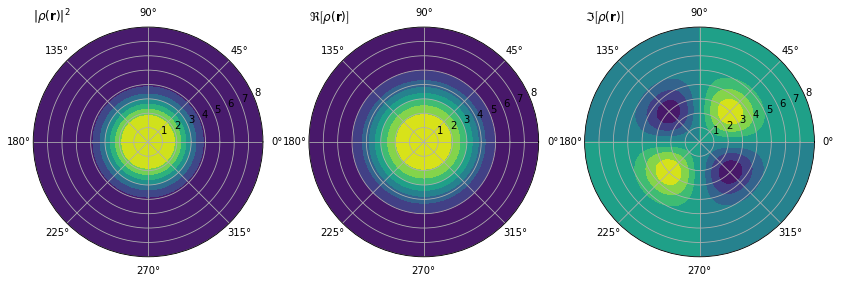

In [7]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(1, 3, 1, polar=True)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.contourf(tdho.T, tdho.R, np.abs(rho * rho.conj()))

ax = fig.add_subplot(1, 3, 2, polar=True)
ax.set_title(r"$\Re\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho.real)

ax = fig.add_subplot(1, 3, 3, polar=True)
ax.set_title(r"$\Im\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho.imag)
plt.show()

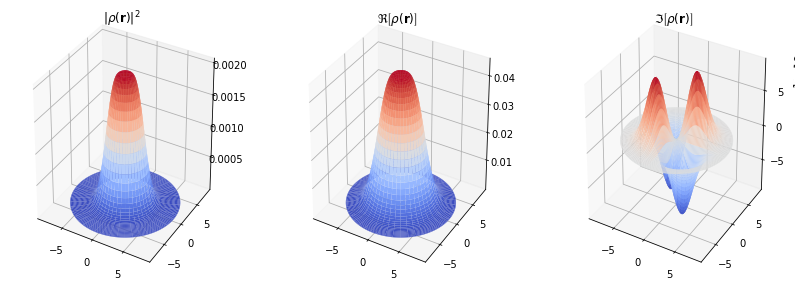

In [8]:
X, Y = tdho.R * np.cos(tdho.T), tdho.R * np.sin(tdho.T)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 3, 1, projection="3d")

ax.plot_surface(X, Y, np.abs(rho * rho.conj()), cmap=cm.coolwarm)
plt.title(r"$|\rho(\mathbf{r})|^2$")

#fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 3, 2, projection="3d")

ax.plot_surface(X, Y, rho.real, cmap=cm.coolwarm)
plt.title(r"$\Re\left[\rho(\mathbf{r})\right]$")

#fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 3, 3, projection="3d")

ax.plot_surface(X, Y, rho.imag, cmap=cm.coolwarm)
plt.title(r"$\Im\left[\rho(\mathbf{r})\right]$")

plt.show()